In [64]:
import pandas as pd
import os

results_dir = '../results/preprocessed_data/task2/'

df_train =  pd.read_csv(os.path.join(results_dir, 'df_train.csv'))
df_test = pd.read_csv(os.path.join(results_dir, 'df_test.csv'))
df_train_target2a = pd.read_csv(os.path.join(results_dir, 'df_train_target2a.csv'))
df_train_target2b = pd.read_csv(os.path.join(results_dir, 'df_train_target2b.csv'))
df_extra_data = pd.read_csv(os.path.join(results_dir, 'df_extra_data.csv'))

# ✅ Mostrar formas
print("✅ Shapes:")
print("df_train         :", df_train.shape)
print("df_test          :", df_test.shape)
print("df_target2a (hipp):", df_train_target2a.shape)
print("df_target2b (baga):", df_train_target2b.shape)
print("df_extra_data    :", df_extra_data.shape)


✅ Shapes:
df_train         : (79, 4)
df_test          : (12, 4)
df_target2a (hipp): (79, 13)
df_target2b (baga): (79, 13)
df_extra_data    : (237, 13)


In [65]:
df_train.head(1)

,filepath,filename,ID,categoria
0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0008_ciso.nii.gz,LISA_0008,ciso


In [66]:
df_test.head(1)

,filepath,filename,ID,categoria
0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0001_ciso.nii.gz,LISA_VALIDATION,ciso


In [67]:
df_train_target2a.head(1)

,filepath,filename,ID,categoria,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_0
0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0001_HF_hipp.nii.gz,LISA_0001,HF_hipp,1180,1214,0,0,0,0,0,0,0


In [68]:
df_train_target2a["categoria"].value_counts()

categoria
HF_hipp    79
Name: count, dtype: int64

In [69]:
df_extra_data.head(3)

,filepath,filename,ID,categoria,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_0
0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_1016_LF_hipp.nii.gz,LISA_1016,LF_hipp,858,1023,0,0,0,0,0,0,0
1,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0055_LF_hipp.nii.gz,LISA_0055,LF_hipp,1344,1481,0,0,0,0,0,0,0
2,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0046_LF_hipp.nii.gz,LISA_0046,LF_hipp,978,980,0,0,0,0,0,0,0


In [70]:
df_train_target2b["categoria"].value_counts()

categoria
HF_baga    79
Name: count, dtype: int64

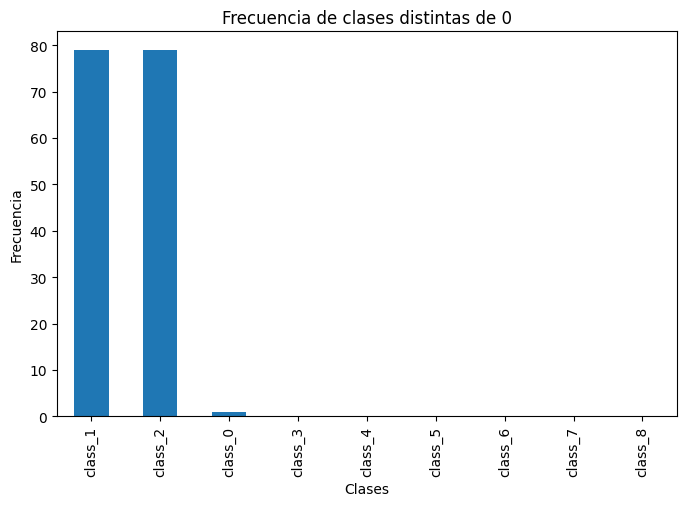

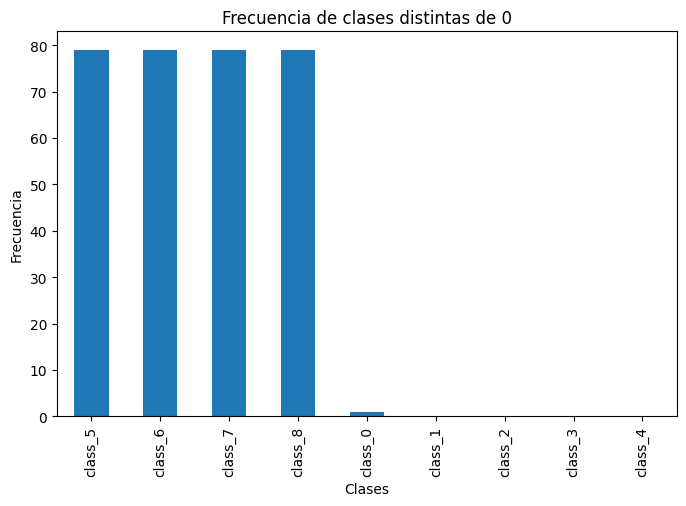

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_class_frequencies(df_train):
    """
    Plots the frequency of classes in the training DataFrame.
    
    Parameters:
    df_train (DataFrame): The training DataFrame containing class columns.
    """
    # Count the number of non-zero classes per row
    class_cols = [c for c in df_train.columns if c.startswith("class_")]

    # Count total occurrences of each class
    freq = (df_train[class_cols] != 0).sum().sort_values(ascending=False)

    # Plotting
    plt.figure(figsize=(8, 5))
    freq.plot(kind="bar")
    plt.ylabel("Frecuencia")
    plt.xlabel("Clases")
    plt.title("Frecuencia de clases distintas de 0")
    plt.show()

plot_class_frequencies(df_train_target2a)
plot_class_frequencies(df_train_target2b)

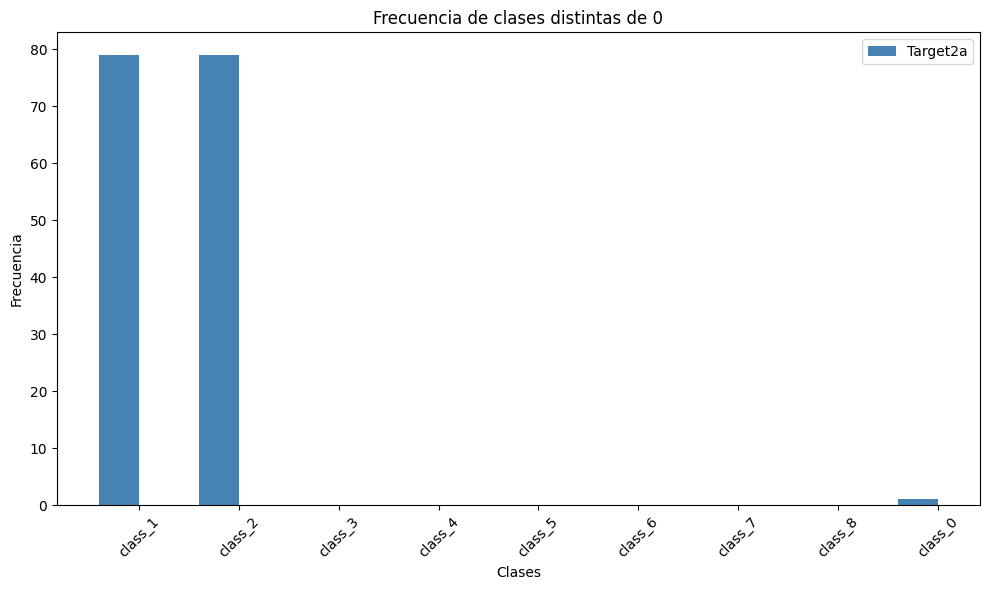

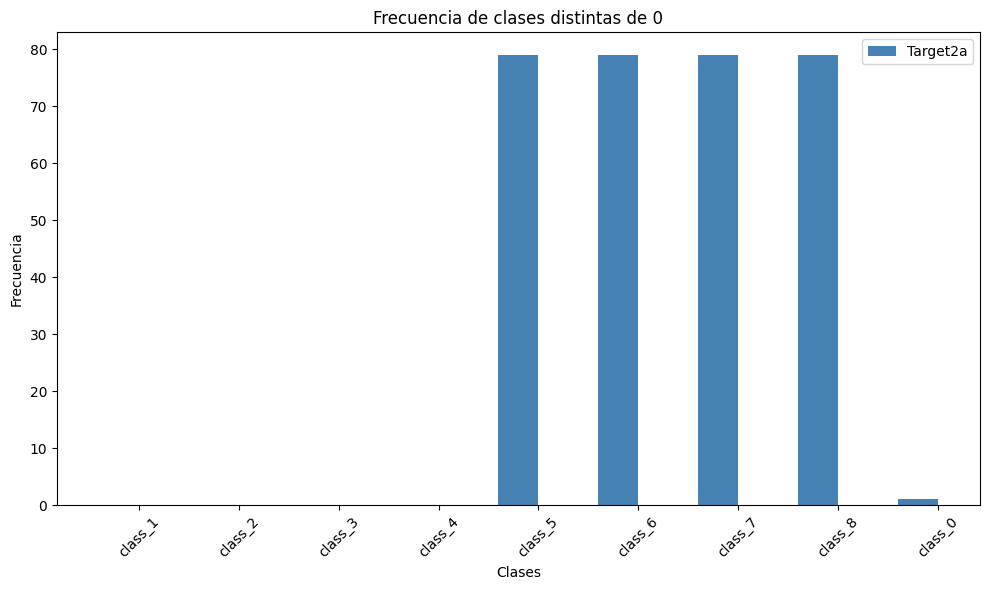

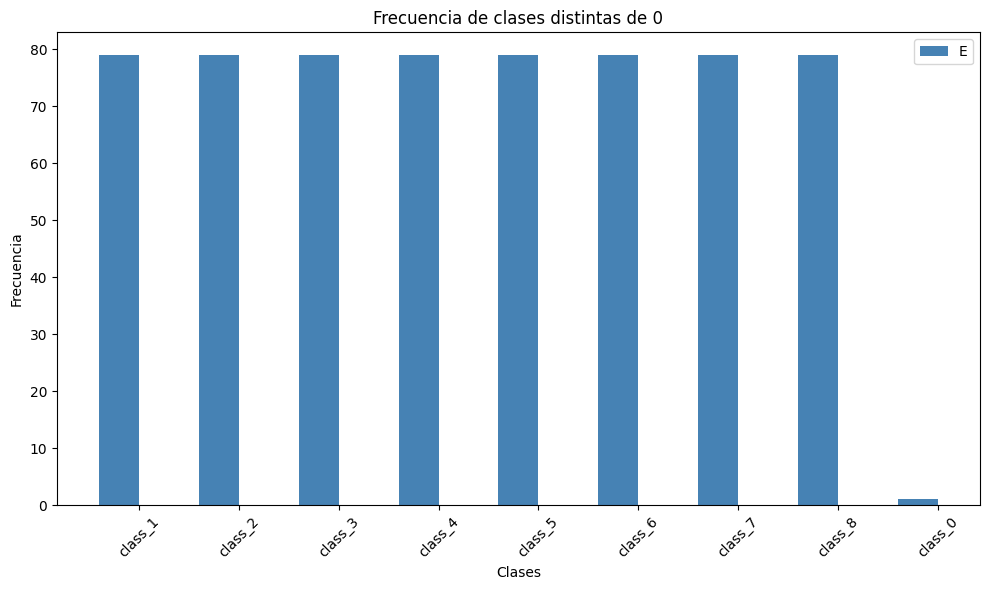

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_class_frequencies(df_list,class_cols, labels=("Dataset A", "Dataset B")):
    """
    Plots the frequency of classes for two DataFrames in the same bar chart.
    
    Parameters:
    df1, df2 (DataFrame): DataFrames containing class columns.
    labels (tuple): Labels for the two datasets.
    """
    # Detectar columnas de clase en orden natural
    x = range(len(class_cols))
    width = 0.4  # ancho de cada barra
    colors=["steelblue","orange","green","red","purple","brown","pink","gray","cyan","magenta"]
    # Crear figura
    plt.figure(figsize=(10, 6))

    for i, df in enumerate(df_list):
      # Contar ocurrencias de cada clase (manteniendo orden original de columnas)
      freq1 = (df[class_cols] != 0).sum()


      plt.bar([i - width/2 for i in x], freq1, width=width, label=labels[0], color=colors[i])
    plt.xticks(x, class_cols, rotation=45)
    plt.ylabel("Frecuencia")
    plt.xlabel("Clases")
    plt.title("Frecuencia de clases distintas de 0")
    plt.legend()
    plt.tight_layout()
    plt.show()


class_cols = [c for c in df_train_target2a.columns if c.startswith("class_")]
plot_class_frequencies([df_train_target2a],class_cols=class_cols, labels=("Target2a", "Target2b","Extra_data"))

class_cols = [c for c in df_train_target2b.columns if c.startswith("class_")]
plot_class_frequencies([df_train_target2b],class_cols=class_cols, labels=("Target2a", "Target2b","Extra_data"))

class_cols = [c for c in df_extra_data.columns if c.startswith("class_")]
plot_class_frequencies([df_extra_data],class_cols=class_cols, labels=("Extra_data"))


In [73]:
df_train_target2a.head()

,filepath,filename,ID,categoria,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_0
0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0001_HF_hipp.nii.gz,LISA_0001,HF_hipp,1180,1214,0,0,0,0,0,0,0
1,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0005_HF_hipp.nii.gz,LISA_0005,HF_hipp,1913,1692,0,0,0,0,0,0,0
2,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0002_HF_hipp.nii.gz,LISA_0002,HF_hipp,1452,1955,0,0,0,0,0,0,0
3,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0010_HF_hipp.nii.gz,LISA_0010,HF_hipp,1054,1030,0,0,0,0,0,0,0
4,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0003_HF_hipp.nii.gz,LISA_0003,HF_hipp,1016,866,0,0,0,0,0,0,0


In [74]:
df_train_target2a[df_train_target2a["class_0"]!=0].head()

,filepath,filename,ID,categoria,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_0
78,/data/cristian/projects/med_data/rise-miccai/t...,LISA_1016_HF_hipp.nii.gz,LISA_1016,HF_hipp,858,1023,0,0,0,0,0,0,8673408


In [75]:
df_train[df_train["filename"].str.contains("LISA_1016")].head(10)

,filepath,filename,ID,categoria
78,/data/cristian/projects/med_data/rise-miccai/t...,LISA_1016_ciso.nii.gz,LISA_1016,ciso


In [76]:
df_train_target2a[df_train_target2a["filename"].str.contains("LISA_1016")].head(10)

,filepath,filename,ID,categoria,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_0
78,/data/cristian/projects/med_data/rise-miccai/t...,LISA_1016_HF_hipp.nii.gz,LISA_1016,HF_hipp,858,1023,0,0,0,0,0,0,8673408


<Axes: xlabel='categoria'>

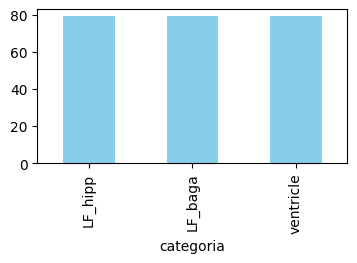

In [77]:
df_extra_data["categoria"].value_counts().plot(kind='bar', figsize=(4, 2), color='skyblue')

In [78]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import random


def find_nonzero_slices(seg, name=""):
    """
    Retorna el índice del slice donde hay segmentación (valor > 0).
    También imprime cuántos slices tienen contenido.
    """
    nonzero_slices = [i for i in range(seg.shape[2]) if np.any(seg[:, :, i] > 0)]
    print(f"📍 {name}: {len(nonzero_slices)} slices con segmentación")
    if nonzero_slices:
        print(f"   Slices con segmentación: {nonzero_slices}")
        return nonzero_slices[len(nonzero_slices)//2]  # Slice medio entre los válidos
    else:
        print(f"⚠️  {name}: Segmentación vacía.")
        return seg.shape[2] // 2  # fallback


img_path: /data/cristian/projects/med_data/rise-miccai/task-2/752/155885752/LISA_0016_ciso.nii.gz


📍 HF Hippocampus: 25 non-empty slices
   Slice indices: [54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
📍 HF Basal Ganglia: 19 non-empty slices
   Slice indices: [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]
Common slices: [74, 75, 76, 77, 78]
HF Hippocampus slice 76 - unique labels: [0. 1. 2.]
HF Basal Ganglia slice 76 - unique labels: [0. 5. 6. 7. 8.]


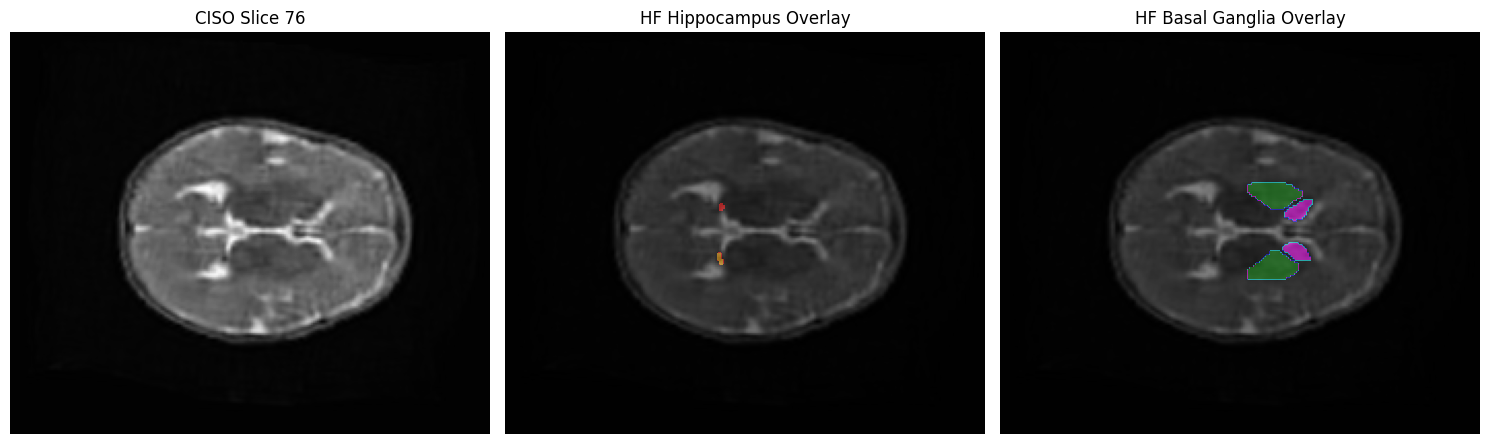


🎯 HF Hippocampus - class-wise masks:


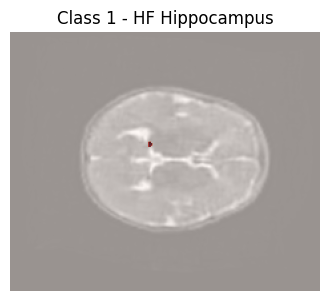

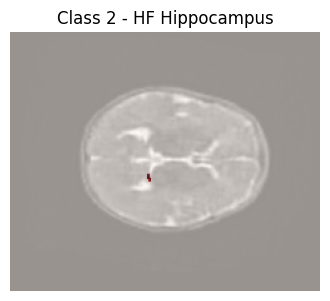


🎯 HF Basal Ganglia - class-wise masks:


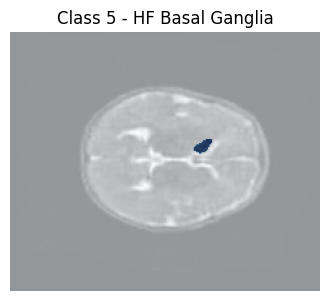

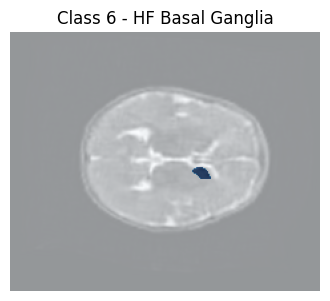

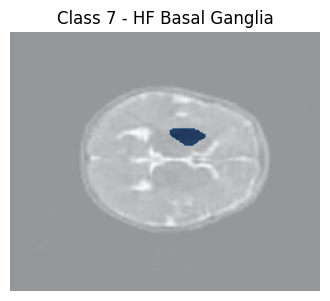

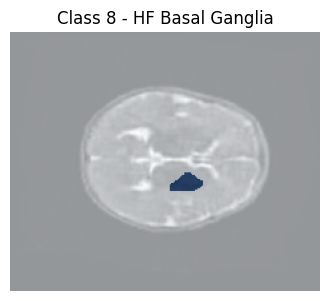

In [79]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import nibabel as nib

# 📌 Utility function
def find_nonzero_slices(seg, name=""):
    nonzero_slices = [i for i in range(seg.shape[2]) if np.any(seg[:, :, i] > 0)]
    print(f"📍 {name}: {len(nonzero_slices)} non-empty slices")
    if nonzero_slices:
        print(f"   Slice indices: {nonzero_slices}")
        return nonzero_slices,nonzero_slices[len(nonzero_slices)//2]
    else:
        print(f"⚠️  {name}: Empty segmentation.")
        return [],seg.shape[2] // 2

# 📁 Sample image from df_train
row = df_train.sample(1).iloc[0]
img_path = row['filepath']
id_sample = row['ID']

print("img_path:", img_path)

# 📁 Corresponding labels
seg_hipp_path = df_train_target2a[df_train_target2a['ID'] == id_sample]['filepath'].values[0]
seg_baga_path = df_train_target2b[df_train_target2b['ID'] == id_sample]['filepath'].values[0]

# 🧠 Load volumes
img = nib.load(img_path).get_fdata()
seg_hipp = nib.load(seg_hipp_path).get_fdata()
seg_baga = nib.load(seg_baga_path).get_fdata()

# 📍 Optimal slice indices
slices_idx_hipp,slice_idx_hipp = find_nonzero_slices(seg_hipp, "HF Hippocampus")
slices_idx_baga,slice_idx_baga = find_nonzero_slices(seg_baga, "HF Basal Ganglia")

slice_idx_hipp = list(set(slices_idx_hipp)&set(slices_idx_baga))
print("Common slices:", slice_idx_hipp)
slice_idx_hipp = slice_idx_hipp[len(slice_idx_hipp)//2]
slice_idx_baga = slice_idx_hipp

# 🖼️ Slice data
img_slice_hipp = img[:, :, slice_idx_hipp]
hipp_slice     = seg_hipp[:, :, slice_idx_hipp]

img_slice_baga = img[:, :, slice_idx_baga]
baga_slice = seg_baga[:, :, slice_idx_baga]

# 🔍 Unique values
hipp_values = np.unique(hipp_slice)
baga_values = np.unique(baga_slice)
print(f"HF Hippocampus slice {slice_idx_hipp} - unique labels: {hipp_values}")
print(f"HF Basal Ganglia slice {slice_idx_baga} - unique labels: {baga_values}")

# 🎨 Consistent colormaps
cmap_hipp = ListedColormap(['black', 'red', 'orange'])
cmap_baga = ListedColormap(['black', 'blue', 'cyan', 'magenta', 'green'])

# 🔎 Main overlay view
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_slice_hipp, cmap='gray')
plt.title(f"CISO Slice {slice_idx_hipp}")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_slice_hipp, cmap='gray')
plt.imshow(hipp_slice, cmap=cmap_hipp, alpha=0.5, vmin=0, vmax=2)
plt.title("HF Hippocampus Overlay")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_slice_baga, cmap='gray')
plt.imshow(baga_slice, cmap=cmap_baga, alpha=0.5, vmin=0, vmax=8)
plt.title("HF Basal Ganglia Overlay")
plt.axis('off')

plt.tight_layout()
plt.show()

# 🧩 Show each class - HF Hippocampus
print("\n🎯 HF Hippocampus - class-wise masks:")
for val in hipp_values:
    if val == 0: continue
    mask = (hipp_slice == val).astype(float)
    plt.figure(figsize=(4, 4))
    plt.imshow(img_slice_hipp, cmap='gray')
    plt.imshow(mask, cmap='Reds', alpha=0.6)
    plt.title(f"Class {int(val)} - HF Hippocampus")
    plt.axis('off')
    plt.show()

# 🧩 Show each class - HF Basal Ganglia
print("\n🎯 HF Basal Ganglia - class-wise masks:")
for val in baga_values:
    if val == 0: continue
    mask = (baga_slice == val).astype(float)
    plt.figure(figsize=(4, 4))
    plt.imshow(img_slice_baga, cmap='gray')
    plt.imshow(mask, cmap='Blues', alpha=0.6)
    plt.title(f"Class {int(val)} - HF Basal Ganglia")
    plt.axis('off')
    plt.show()


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nibabel as nib
from collections import defaultdict
from tqdm import tqdm

def plot_voxel_boxplot_from_df(df, task_name):
    class_cols = [f'class_{i}' for i in range(1, 9)]

    # 🚫 Skip if all class columns are empty
    if df[class_cols].sum().sum() == 0:
        print(f"⚠️ Skipping {task_name} — all masks are empty.")
        return

    # 🔄 Convert to long format
    df_long = df.melt(
        id_vars=["filename"],
        value_vars=class_cols,
        var_name="Class",
        value_name="Voxel Count"
    )

    # Filtrar ceros
    df_long = df_long[df_long["Voxel Count"] > 0]

    # 📈 Boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_long, x="Class", y="Voxel Count", palette="mako")
    sns.stripplot(data=df_long, x="Class", y="Voxel Count", color='black', size=3, jitter=True, alpha=0.4)

    variance = np.var(df_long["Voxel Count"])
    plt.title(f"{task_name} – Voxel Count per Class (Boxplot)\nVariance = {variance:.2f}", fontsize=13)
    plt.xlabel("Class Label", fontsize=12)
    plt.ylabel("Voxel Count", fontsize=12)
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

    print(f"📉 Variance for {task_name}: {variance:.2f}")
    return df_long, variance



/tmp/ipykernel_1804486/2358459743.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x="Class", y="Voxel Count", palette="mako")


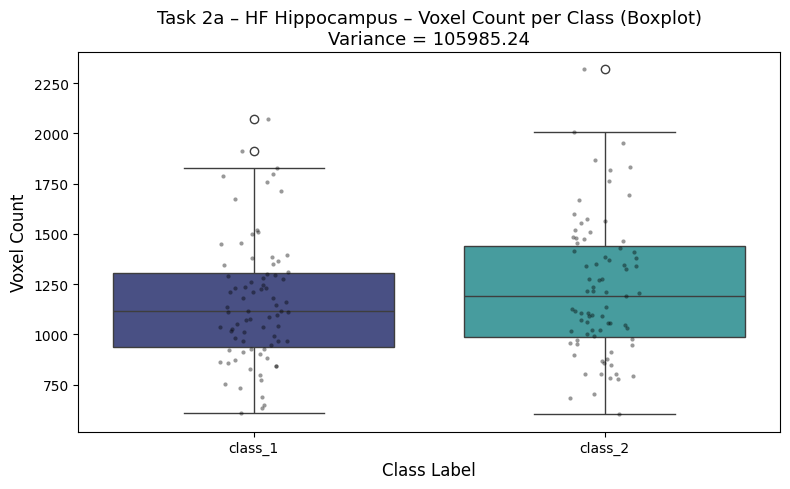

/tmp/ipykernel_1804486/2358459743.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x="Class", y="Voxel Count", palette="mako")


📉 Variance for Task 2a – HF Hippocampus: 105985.24


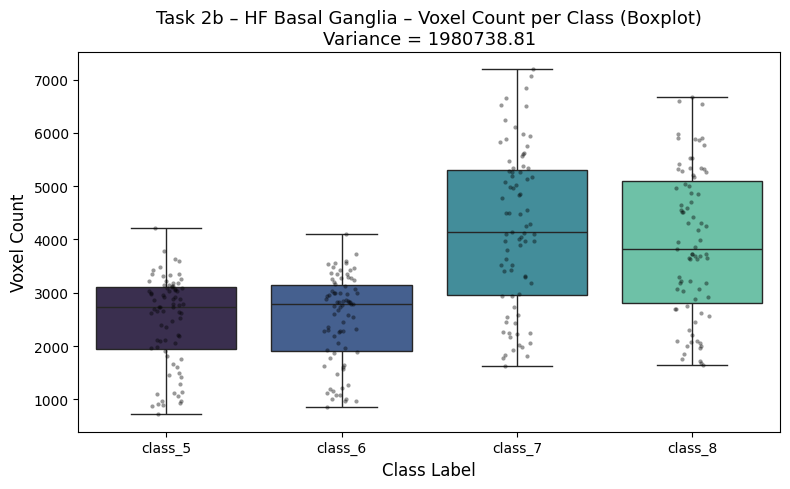

📉 Variance for Task 2b – HF Basal Ganglia: 1980738.81


In [15]:
df_box_2a, var_2a = plot_voxel_boxplot_from_df(df_train_target2a, "Task 2a – HF Hippocampus")
df_box_2b, var_2b = plot_voxel_boxplot_from_df(df_train_target2b, "Task 2b – HF Basal Ganglia")


In [16]:
def plot_voxel_boxplot_by_category(df, category_name):
    # 🎯 Filter category
    df_cat = df[df["categoria"] == category_name].copy()

    if df_cat.empty:
        print(f"⚠️ No data found for category: {category_name}")
        return

    # 🚫 Skip if all values are 0
    class_cols = [f'class_{i}' for i in range(1, 9)]
    if df_cat[class_cols].sum().sum() == 0:
        print(f"⚠️ Skipping category {category_name} — all masks are empty.")
        return

    # 🔄 Melt to long format for Seaborn
    df_long = df_cat.melt(
        id_vars=["filename"],
        value_vars=class_cols,
        var_name="Class",
        value_name="Voxel Count"
    )

    # Remove zero voxel entries
    df_long = df_long[df_long["Voxel Count"] > 0]

    # 📈 Boxplot + stripplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_long, x="Class", y="Voxel Count", palette="rocket")
    sns.stripplot(data=df_long, x="Class", y="Voxel Count", color='black', size=3, jitter=True, alpha=0.4)

    variance = np.var(df_long["Voxel Count"])
    plt.title(f"{category_name} – Voxel Count per Class (Boxplot)\nVariance = {variance:.2f}", fontsize=13)
    plt.xlabel("Class Label", fontsize=12)
    plt.ylabel("Voxel Count", fontsize=12)
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

    print(f"📉 Variance for {category_name}: {variance:.2f}")
    return df_long, variance


/tmp/ipykernel_1804486/3139950329.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x="Class", y="Voxel Count", palette="rocket")


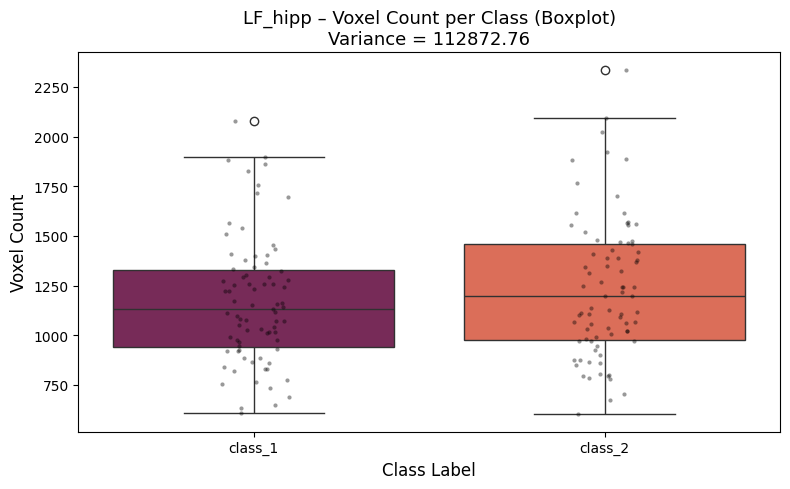

📉 Variance for LF_hipp: 112872.76


/tmp/ipykernel_1804486/3139950329.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x="Class", y="Voxel Count", palette="rocket")


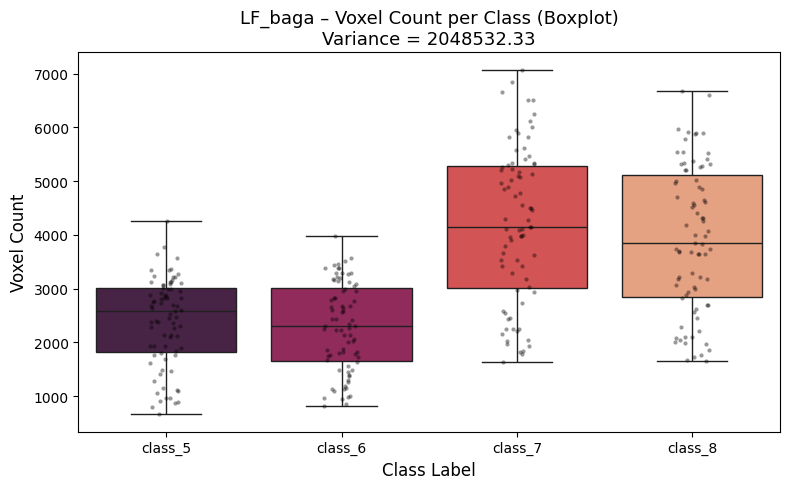

📉 Variance for LF_baga: 2048532.33


/tmp/ipykernel_1804486/3139950329.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x="Class", y="Voxel Count", palette="rocket")


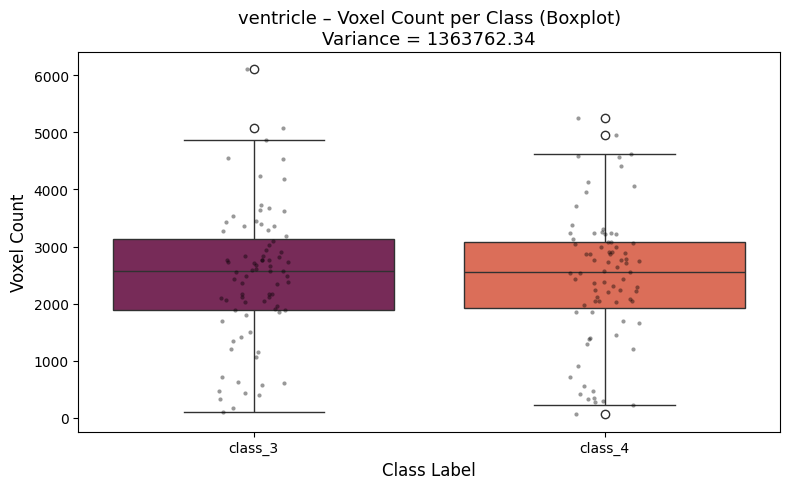

📉 Variance for ventricle: 1363762.34


In [17]:
df_box_lf_hipp, var_lf_hipp = plot_voxel_boxplot_by_category(df_extra_data, "LF_hipp")
df_box_lf_baga, var_lf_baga = plot_voxel_boxplot_by_category(df_extra_data, "LF_baga")
df_box_vent,     var_vent   = plot_voxel_boxplot_by_category(df_extra_data, "ventricle")


<Axes: xlabel='categoria'>

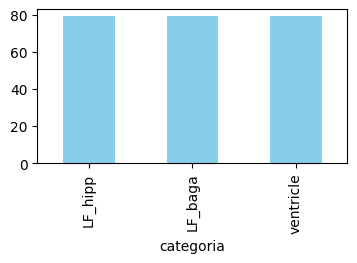

In [21]:
df_extra_data["categoria"].value_counts().plot(kind='bar', figsize=(4, 2), color='skyblue')

    Task 2a HF Hippocampus    class 1 2
    Task 2b HF Basal Ganglia  class 5 6 7 8
    External LF Hippocampus   class 1 2
    External LF Basal Ganglia class 5 6 7 8
    External Ventricle        class 3 4
